# 2023_Osteoarthritis

In [6]:
#reinstall package
#%pip install numpy==1.20.3
#%pip install pandas==3.0.7

%-m pip install --upgrade pip

UsageError: Line magic function `%-m` not found.


In [1]:
# load the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Read the metadata input

In [3]:
# read the data
#path = '/Users/katerynapantiukh/Documents/1MyDisk/Code'
path = '/Users/ketpantuh/Documents/1MyDisk/Code'

meta = pd.read_csv(path+'/Code_R/2023_Lucas/input/all_metadata.csv', index_col=0)
meta = meta[['V_Code', 'gender', 'Age_at_MBsample', 'BMI',
       'doesPhysicalExercise', 'Sample.drawDate', 'Sample.drawTime',
       'Sample.visitNumber']]
meta.head(2)

,V_Code,gender,Age_at_MBsample,BMI,doesPhysicalExercise,Sample.drawDate,Sample.drawTime,Sample.visitNumber
1,V3QWML,0,77,21.39,1,2019-11-05,12:05:00,2
2,VE3OSU,1,67,22.78,1,2019-07-03,10:19:00,3


In [4]:
# form the metadata sets
grRA = pd.read_excel(path + '/Code_R/2023_Lucas/input/all_metadata_groups.xlsx', sheet_name='RA')
meta_RA = grRA.merge(meta, on='V_Code', how='left')

grOAprev = pd.read_excel(path + '/Code/Code_R/2023_Lucas/input/all_metadata_groups.xlsx', sheet_name='OA_prev')
meta_OAprev = grOAprev.merge(meta, on='V_Code', how='left')

grOAinc = pd.read_excel(path + '/Code/Code_R/2023_Lucas/input/all_metadata_groups.xlsx', sheet_name='OA_incident')
meta_OAinc = grOAinc.merge(meta, on='V_Code', how='left')

meta_RA.tail(2)


ImportError: Pandas requires version '3.0.7' or newer of 'openpyxl' (version '3.0.5' currently installed).

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming that 'wbcd' is a pandas DataFrame containing columns 2 to 11
wbcd_subset = meta.iloc[:, 1:4]

# Calculate the correlation matrix
corr = wbcd_subset.corr()

# Plot the correlation matrix as a heatmap
sns.set(style="white")
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap="gray", vmin=-1, vmax=1, square=True)
plt.title("Cancer Mean")
plt.show()

# Optional: plot the histograms of each variable in a grid
sns.set(style="ticks")
sns.pairplot(wbcd_subset)
plt.show()


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/matrix.py:68: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  mask = np.zeros(data.shape, np.bool)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

<Figure size 1000x1000 with 0 Axes>

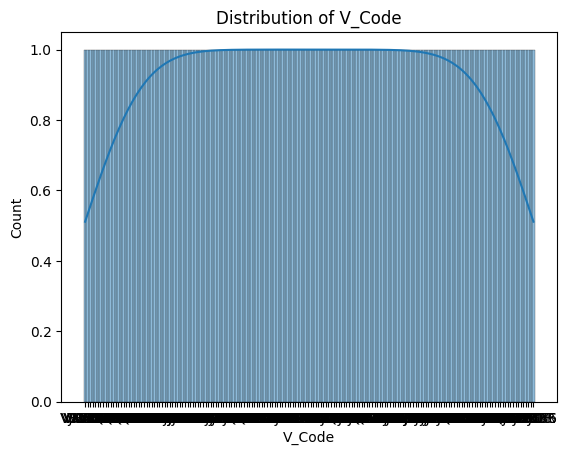

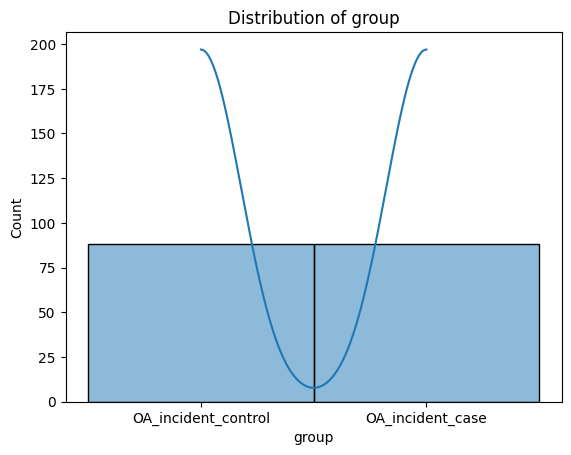

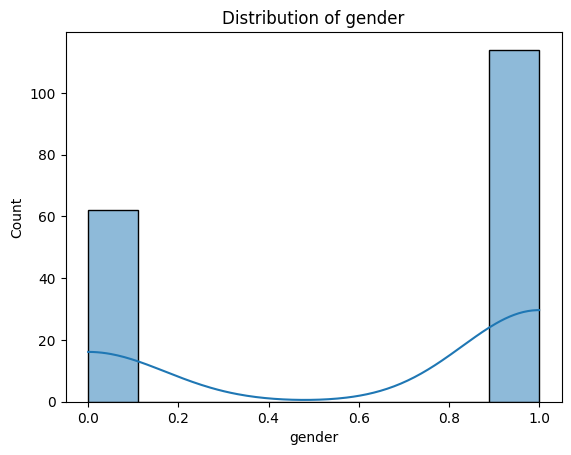

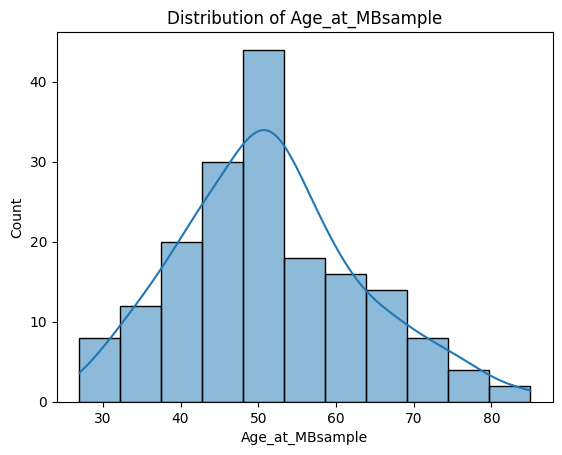

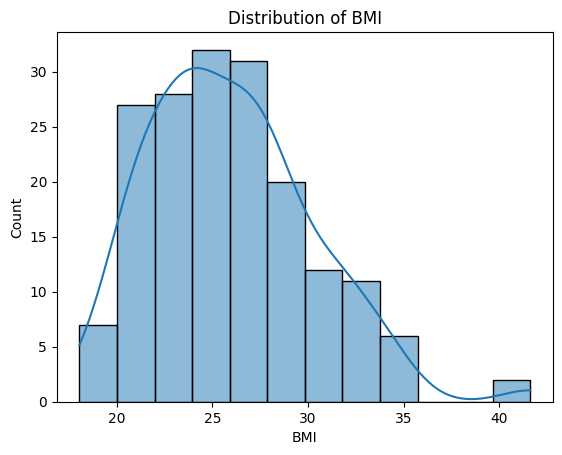

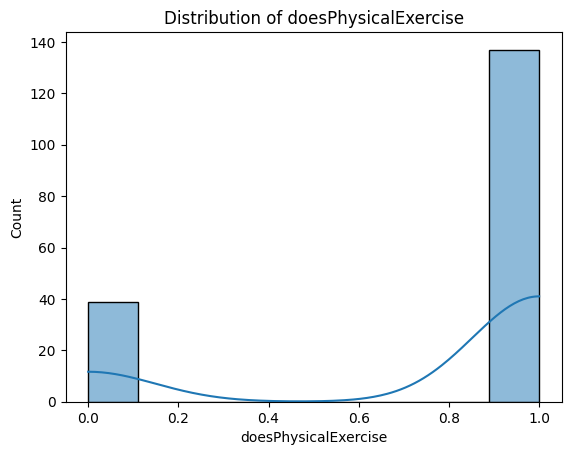

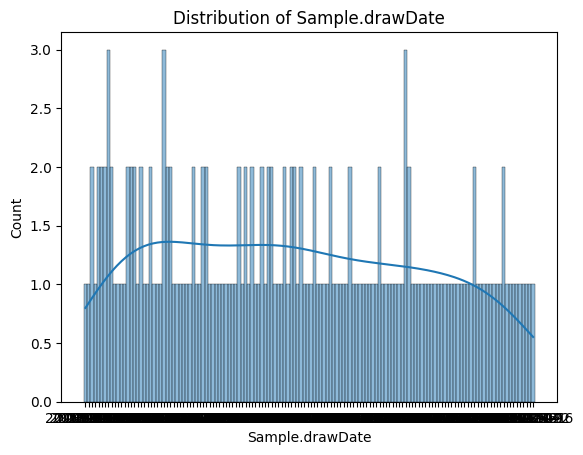

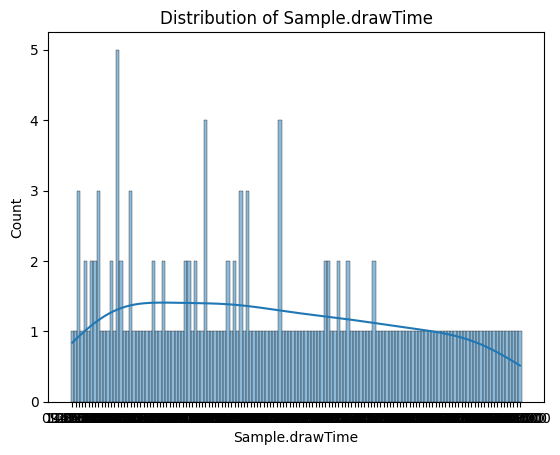

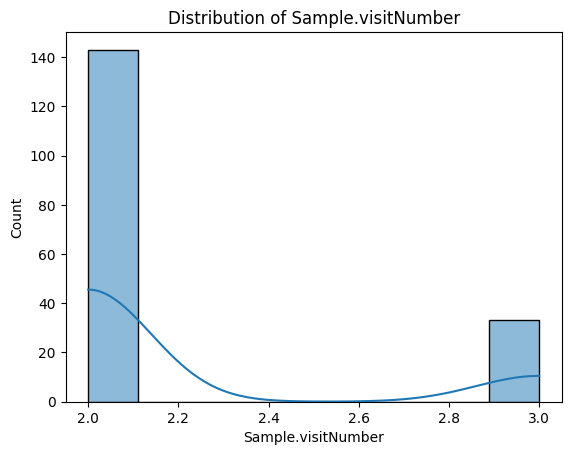

In [102]:
for col in meta_OAinc.columns:
    sns.histplot(meta_OAinc[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [115]:
df = meta_OAprev

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve


# select the features and target variables
X = df[['gender', 'Age_at_MBsample', 'BMI', 'doesPhysicalExercise']]
y = df['group']

# convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=['gender'])

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# fit a logistic regression model to the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# make predictions on the testing data and compute the false positive rate, true positive rate, and thresholds
if 'case' in y_test.unique():
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test == 'case', y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
else:
    print('No positive samples in the test set for the case group')



No positive samples in the test set for the case group


In [114]:
y_test

381       OA_prev_case
664       OA_prev_case
257    OA_prev_control
338    OA_prev_control
319    OA_prev_control
            ...       
238    OA_prev_control
0      OA_prev_control
684       OA_prev_case
281    OA_prev_control
534       OA_prev_case
Name: group, Length: 277, dtype: object

## Read the profiles

In [31]:
# Read and filter the taxa table
tax = pd.read_csv('/Users/katerynapantiukh/Documents/1MyDisk/Code/Code_R/2023_Lucas/input/mOTUs_merged_profiles.txt', sep='\t')
tax.head(2)

,#consensus_taxonomy,MB11,MB16_D11,MB20,MB22,V00H9L,V010T4,V03HFT,V05N83,V05U4U,...,VZIVTO,VZJICJ,VZOC83,VZR688,VZSPJW,VZSQ0C,VZUFR8,VZXIHP,VZY957,VZYSJ2
0,Leptospira alexanderi [ref_mOTU_v3_00001],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Leptospira weilii [ref_mOTU_v3_00002],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


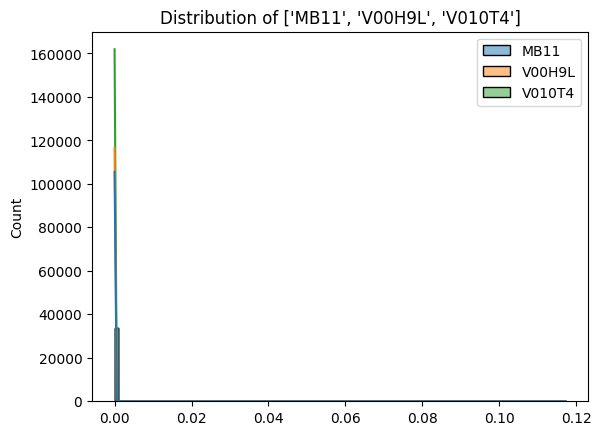

In [106]:
tcol = [['MB11', 'V00H9L', 'V010T4']]
for col in tcol:
    sns.histplot(tax[col], kde=True, bins=100)
    plt.title(f'Distribution of {col}')

## Check the inputs

In [33]:
print(tax.shape)

(33571, 909)


In [44]:
cols = list(tax.columns)
#plt.hist(tax[cols].sum())

nn = tax[cols].sum()
nn.isna().sum()

0

In [39]:
# Read and filter the taxa table
taxF = tax.loc[(tax != 0).sum(axis=1) > 0.01 * tax.shape[1]]

print('Initial number of OTUs are: ', tax.shape[0])
print('After filering by >1% prevalence, number of OTUs are: ', taxF.shape[0])

taxF[cols].sum()


Initial number of OTUs are:  33571
After filering by >1% prevalence, number of OTUs are:  1850


#consensus_taxonomy    Enterobacter sp. [ref_mOTU_v3_00077]Klebsiella...
MB11                                                            0.882822
MB16_D11                                                        0.994319
MB20                                                            0.999122
MB22                                                                 1.0
                                             ...                        
VZSQ0C                                                          0.999838
VZUFR8                                                          0.999791
VZXIHP                                                          0.977325
VZY957                                                          0.997165
VZYSJ2                                                          0.998899
Length: 909, dtype: object

(array([310., 285., 140.,  72.,  44.,  23.,  14.,  13.,   3.,   4.]),
 array([0.04425659, 0.11316731, 0.18207804, 0.25098877, 0.3198995 ,
        0.38881023, 0.45772096, 0.52663169, 0.59554241, 0.66445314,
        0.73336387]),
 <BarContainer object of 10 artists>)

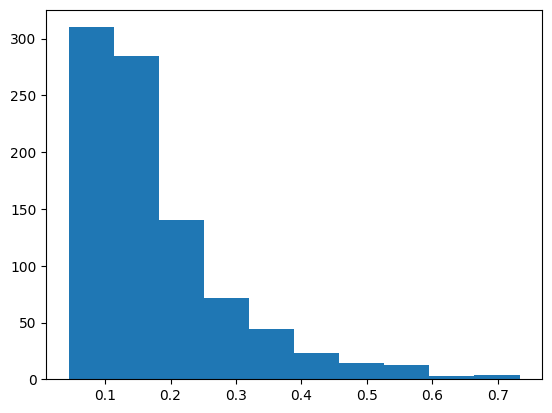

In [30]:
# Check the range of values in each column before scaling
plt.hist(tax[cols].max())

In [20]:

# Extract the column names and drop the 'sp_name' column
cols = list(taxF.columns)
cols.remove('#consensus_taxonomy')

# Create a MinMaxScaler object and fit it to the data
scaler = MinMaxScaler()
scaler.fit(taxF[cols])

# Rescale the data and convert it back to a DataFrame
df_scaled = pd.DataFrame(scaler.transform(taxF[cols]), columns=cols)

# Concatenate the 'sp_name' column with the scaled data
taxF_scaled = pd.concat([taxF['#consensus_taxonomy'], df_scaled], axis=1)

# Print the scaled DataFrame
taxF_scaled.head()
taxF['MB11'].sum()



0.8828221422